Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

Load the datasets

In [2]:
balancing_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/balancing_data.csv')
demand_load_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/demand_load_data.csv')
generation_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/generation_data.csv')
price_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/price_data.csv')

Convert GMT Time to datetime

In [3]:
for df in [balancing_data, demand_load_data, generation_data, price_data]:
    df['GMT Time'] = pd.to_datetime(df['GMT Time'])

Replace 'No Data Available' with NaN

In [4]:
for df in [balancing_data, demand_load_data, generation_data, price_data]:
    df.replace('No Data Available', np.nan, inplace=True)

Merge datasets on GMT Time

In [5]:
merged_data = pd.merge(balancing_data, demand_load_data, on='GMT Time')
merged_data = pd.merge(merged_data, generation_data, on='GMT Time')
merged_data = pd.merge(merged_data, price_data, on='GMT Time')

Convert all columns to numeric

In [6]:
for col in merged_data.columns:
    if merged_data[col].dtype == 'object':
        merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

Handle missing values

In [7]:
merged_data.fillna(method='ffill', inplace=True)
merged_data.fillna(method='bfill', inplace=True)

/var/folders/4n/xlvp5dd530zgvp5yzcjmsv400000gn/T/ipykernel_72695/907699182.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)
/var/folders/4n/xlvp5dd530zgvp5yzcjmsv400000gn/T/ipykernel_72695/907699182.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='bfill', inplace=True)


Feature Engineering

In [8]:
merged_data['Hour'] = merged_data['GMT Time'].dt.hour
merged_data['Day'] = merged_data['GMT Time'].dt.day
merged_data['Month'] = merged_data['GMT Time'].dt.month
merged_data['Year'] = merged_data['GMT Time'].dt.year
merged_data['DayOfWeek'] = merged_data['GMT Time'].dt.dayofweek

Plotting the distribution of System Price

/opt/homebrew/Caskroom/miniconda/base/envs/ds_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


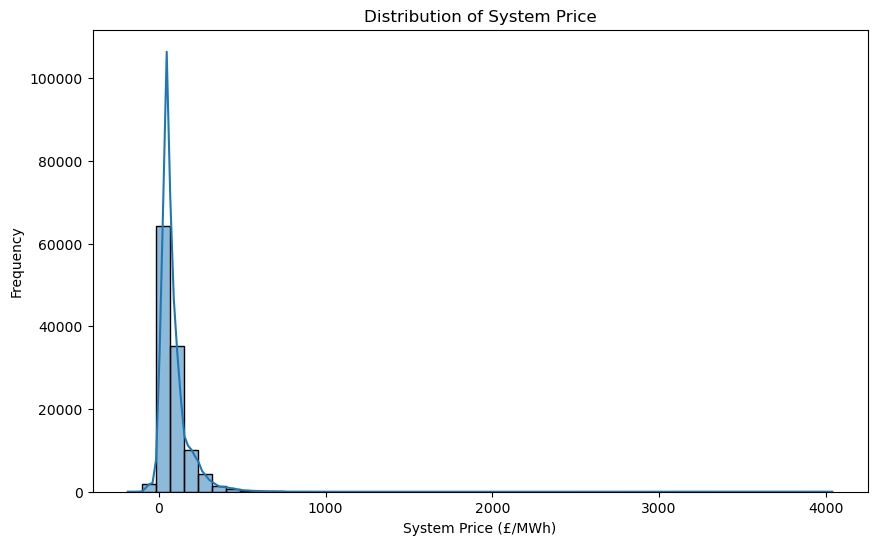

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['System Price (ESO Outturn) - GB (£/MWh)'], bins=50, kde=True)
plt.title('Distribution of System Price')
plt.xlabel('System Price (£/MWh)')
plt.ylabel('Frequency')
plt.show()

Plotting the distribution of Net Imbalance Volume

/opt/homebrew/Caskroom/miniconda/base/envs/ds_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


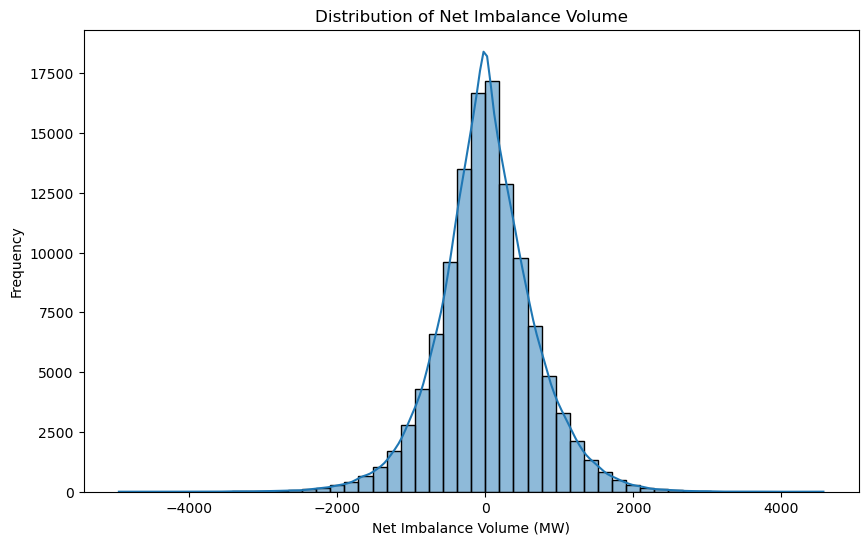

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['NIV Outturn (+ve long) - GB (MW)'], bins=50, kde=True)
plt.title('Distribution of Net Imbalance Volume')
plt.xlabel('Net Imbalance Volume (MW)')
plt.ylabel('Frequency')
plt.show()

Plotting the correlation matrix

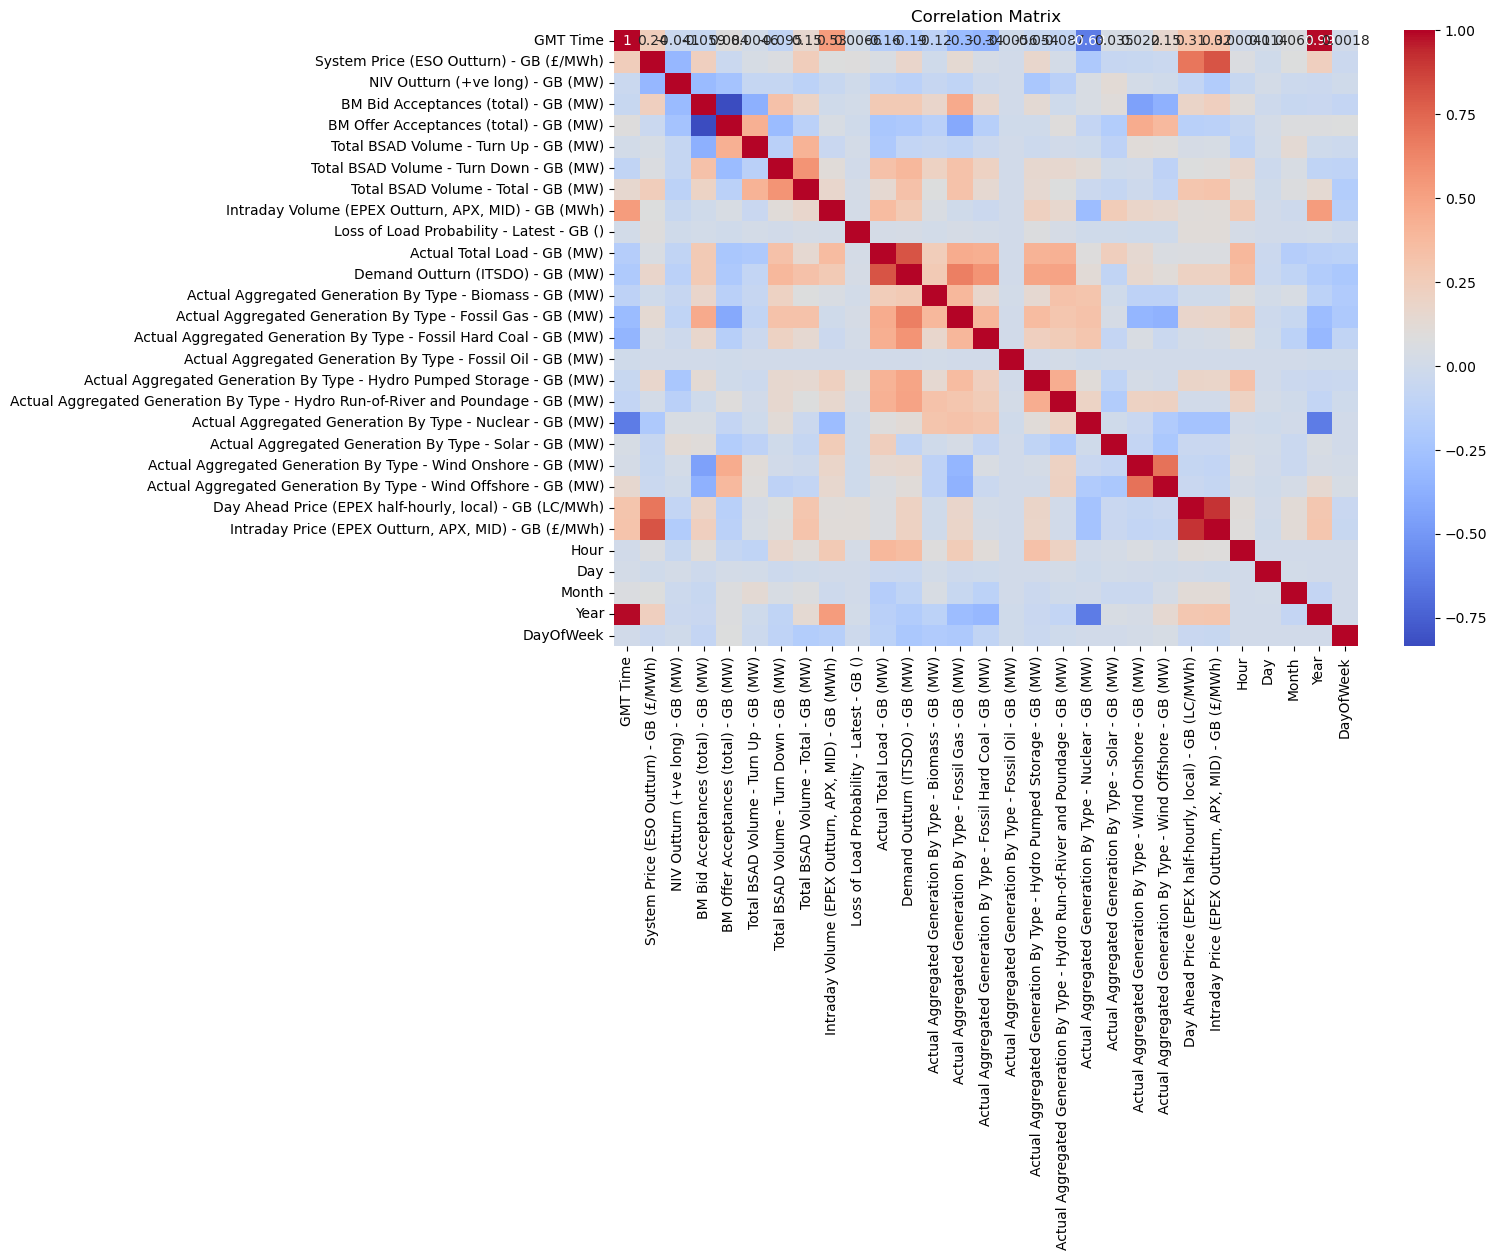

In [11]:
plt.figure(figsize=(12, 8))
correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Time series decomposition for System Price

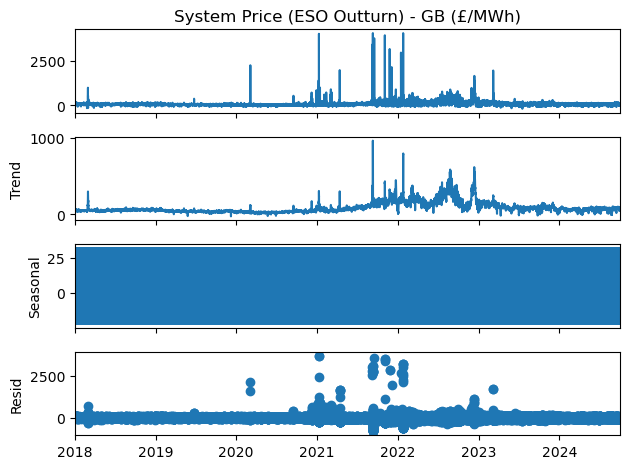

In [12]:
result = seasonal_decompose(merged_data.set_index('GMT Time')['System Price (ESO Outturn) - GB (£/MWh)'], model='additive', period=48)
result.plot()
plt.show()

Time series decomposition for Net Imbalance Volume

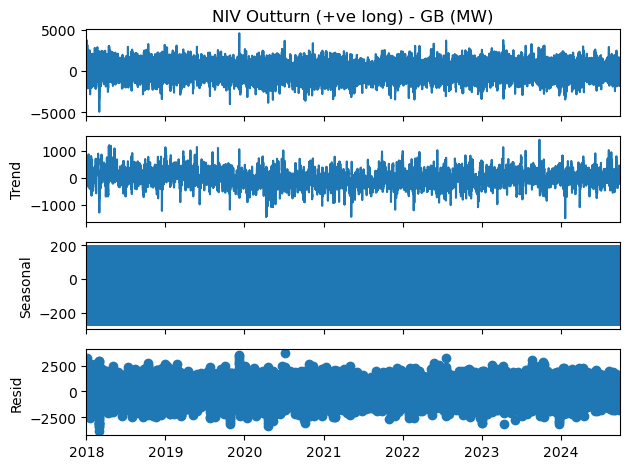

In [13]:
result = seasonal_decompose(merged_data.set_index('GMT Time')['NIV Outturn (+ve long) - GB (MW)'], model='additive', period=48)
result.plot()
plt.show()

Plotting System Price over time

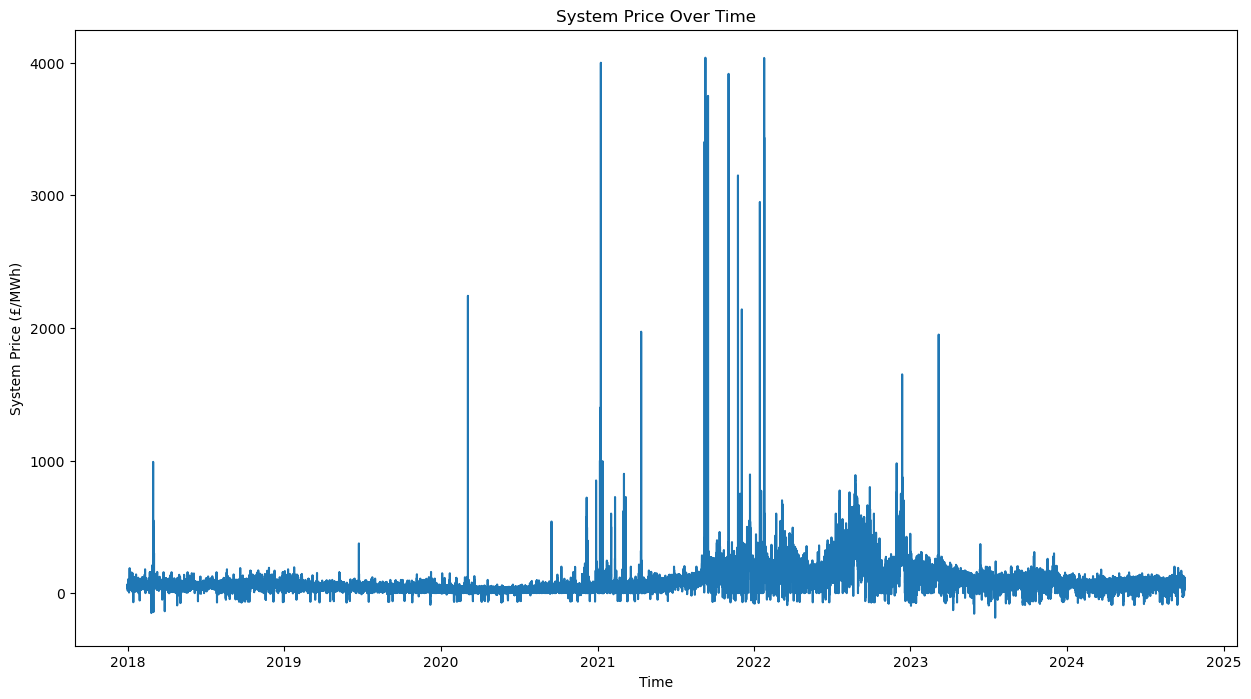

In [14]:
plt.figure(figsize=(15, 8))
plt.plot(merged_data['GMT Time'], merged_data['System Price (ESO Outturn) - GB (£/MWh)'])
plt.title('System Price Over Time')
plt.xlabel('Time')
plt.ylabel('System Price (£/MWh)')
plt.show()

Plotting Net Imbalance Volume over time

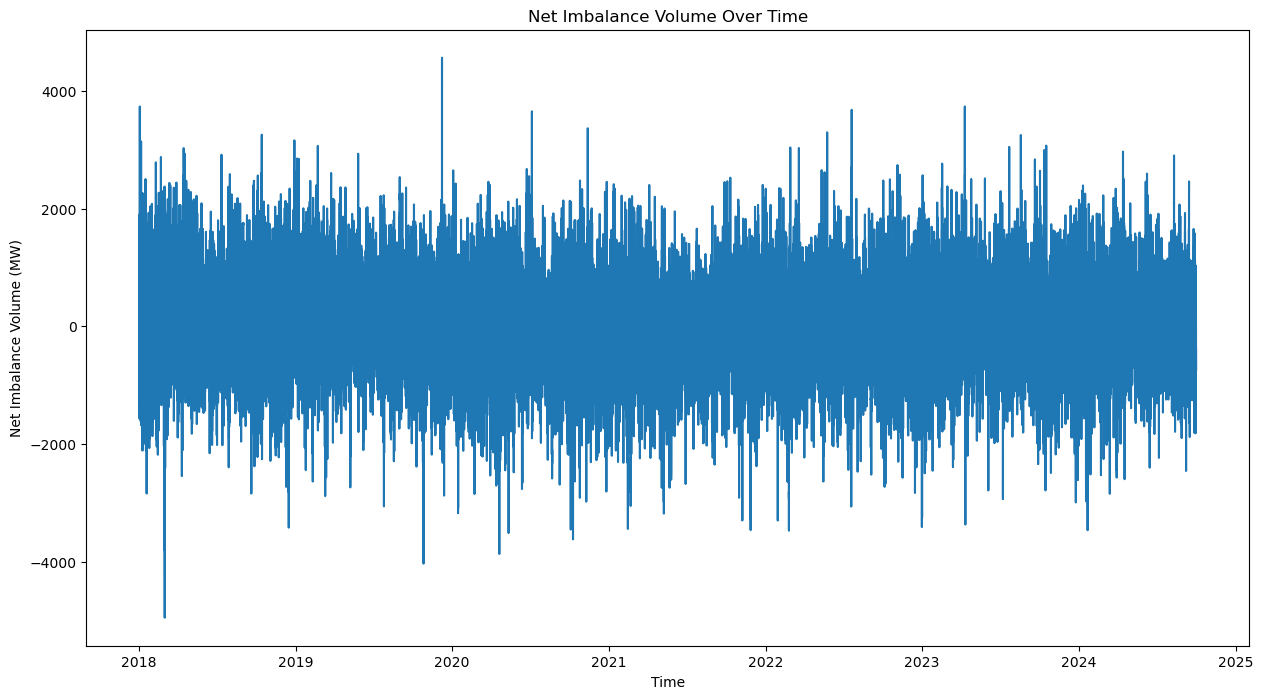

In [15]:
plt.figure(figsize=(15, 8))
plt.plot(merged_data['GMT Time'], merged_data['NIV Outturn (+ve long) - GB (MW)'])
plt.title('Net Imbalance Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Net Imbalance Volume (MW)')
plt.show()

Plotting average System Price by hour of the day

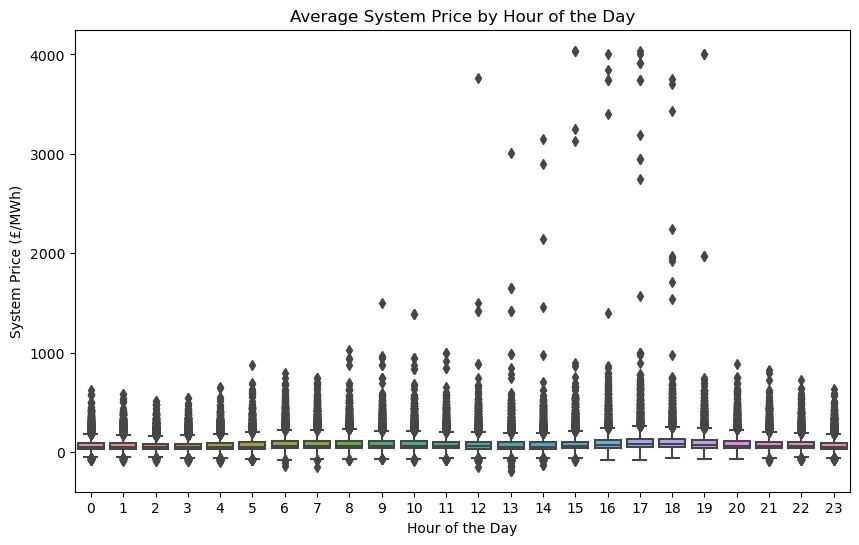

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='System Price (ESO Outturn) - GB (£/MWh)', data=merged_data)
plt.title('Average System Price by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('System Price (£/MWh)')
plt.show()

Plotting average Net Imbalance Volume by hour of the day

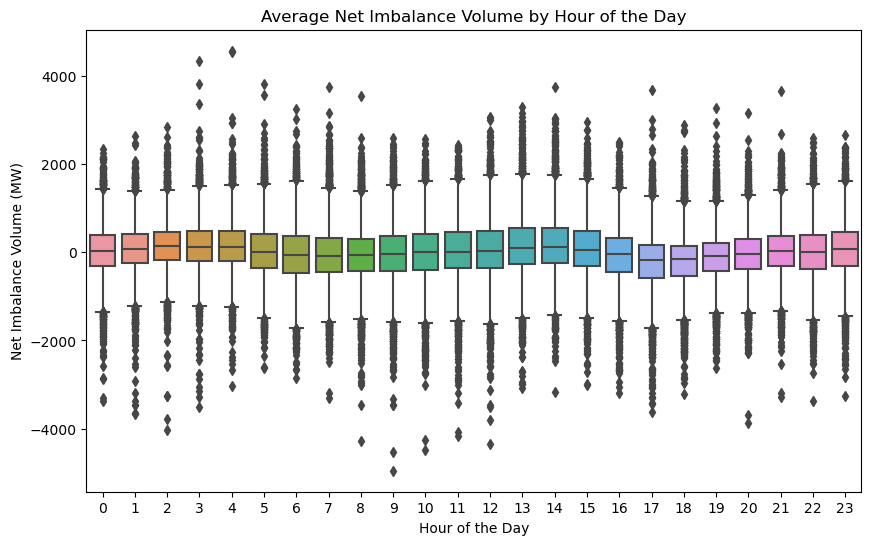

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='NIV Outturn (+ve long) - GB (MW)', data=merged_data)
plt.title('Average Net Imbalance Volume by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Net Imbalance Volume (MW)')
plt.show()

Plotting average System Price by day of the week

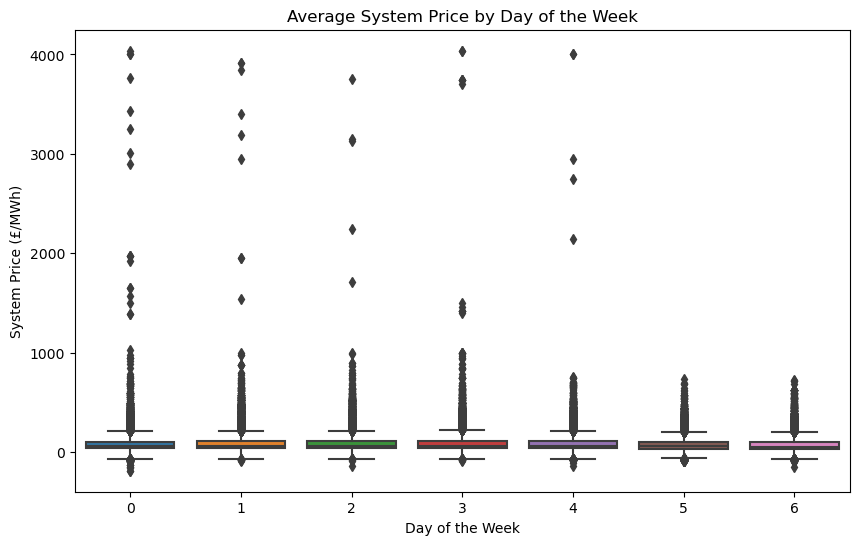

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='System Price (ESO Outturn) - GB (£/MWh)', data=merged_data)
plt.title('Average System Price by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('System Price (£/MWh)')
plt.show()

Plotting average Net Imbalance Volume by day of the week

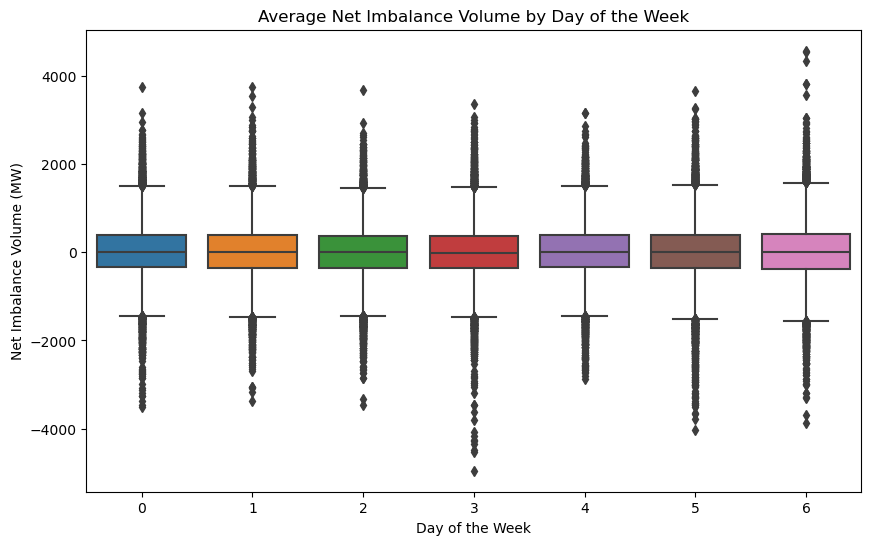

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='NIV Outturn (+ve long) - GB (MW)', data=merged_data)
plt.title('Average Net Imbalance Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Net Imbalance Volume (MW)')
plt.show()

Plotting average System Price by month

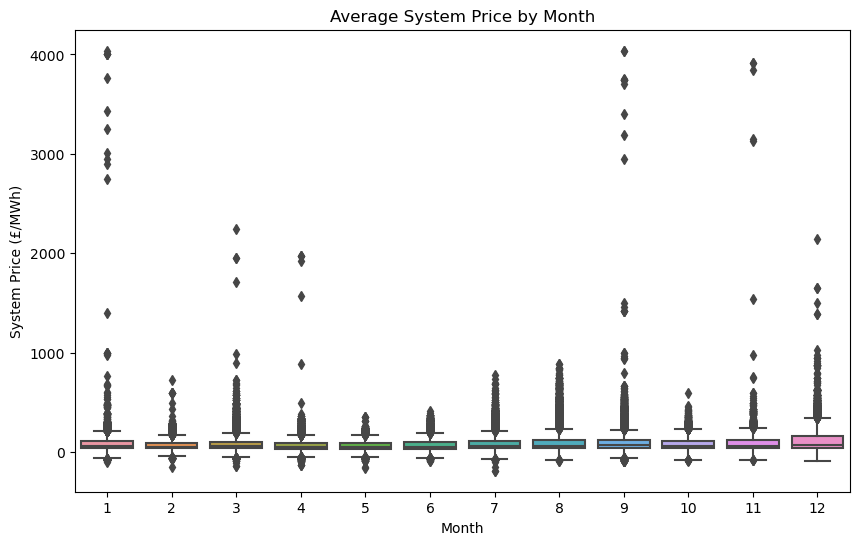

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='System Price (ESO Outturn) - GB (£/MWh)', data=merged_data)
plt.title('Average System Price by Month')
plt.xlabel('Month')
plt.ylabel('System Price (£/MWh)')
plt.show()

Plotting average Net Imbalance Volume by month

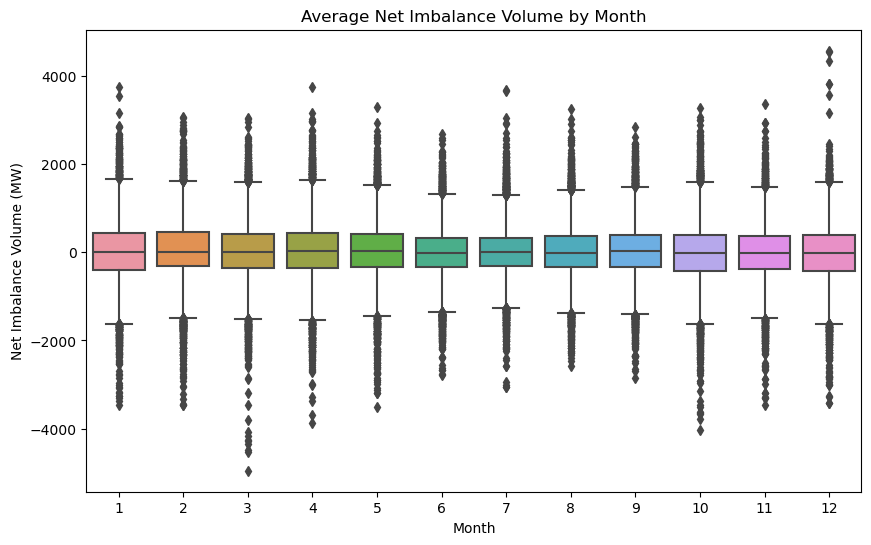

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='NIV Outturn (+ve long) - GB (MW)', data=merged_data)
plt.title('Average Net Imbalance Volume by Month')
plt.xlabel('Month')
plt.ylabel('Net Imbalance Volume (MW)')
plt.show()